In [12]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
from math import sqrt

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from matplotlib import style
style.use('seaborn')

import os
print(os.listdir("Desktop/CS 514 AAI/all"))

['items.csv', 'item_categories.csv', 'sales_train.csv.gz', 'sales_train_v2.csv', 'sample_submission.csv', 'sample_submission.csv.gz', 'shops.csv', 'test.csv', 'test.csv.gz']


In [16]:
PATH = 'Desktop/CS 514 AAI/all/'

In [17]:
sales = pd.read_csv(PATH + 'sales_train_v2.csv', low_memory=False)
sales.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [18]:
sales.describe(include="all")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
unique,1034,NaN,NaN,NaN,NaN,NaN
top,28.12.2013,NaN,NaN,NaN,NaN,NaN
freq,9434,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,NaN,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,NaN,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,NaN,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,NaN,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00


In [19]:
items = pd.read_csv(PATH + 'items.csv', low_memory=False, index_col=1)
items.head()

,item_name,item_category_id
item_id,,
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40
1,!ABBYY FineReader 12 Professional Edition Full...,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,40
4,***КОРОБКА (СТЕКЛО) D,40


In [20]:
item_cat = pd.read_csv(PATH + 'item_categories.csv', low_memory=False, index_col=1)
item_cat.head()

,item_category_name
item_category_id,
0,PC - Гарнитуры/Наушники
1,Аксессуары - PS2
2,Аксессуары - PS3
3,Аксессуары - PS4
4,Аксессуары - PSP


In [21]:
shops = pd.read_csv(PATH + 'shops.csv', low_memory=False, index_col=1)
shops.head()

,shop_name
shop_id,
0,"!Якутск Орджоникидзе, 56 фран"
1,"!Якутск ТЦ ""Центральный"" фран"
2,"Адыгея ТЦ ""Мега"""
3,"Балашиха ТРК ""Октябрь-Киномир"""
4,"Волжский ТЦ ""Волга Молл"""


In [22]:
test = pd.read_csv(PATH + 'test.csv', low_memory=False, index_col=0)
test.head()

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [23]:
def assign_key(df): 
    df['key'] = df['item_id'].astype('int32').map(str) + "_" + df['shop_id'].astype('int32').map(str)
    
assign_key(sales)
assign_key(test)

In [24]:
test['key'][~test['key'].isin(sales['key'])].shape[0] / test['key'].shape[0]

0.479906629318394

In [25]:
test['item_id'][~test['item_id'].isin(sales['item_id'])].drop_duplicates().shape[0]

363

In [26]:
test['shop_id'][~test['shop_id'].isin(sales['shop_id'])].shape[0]

0

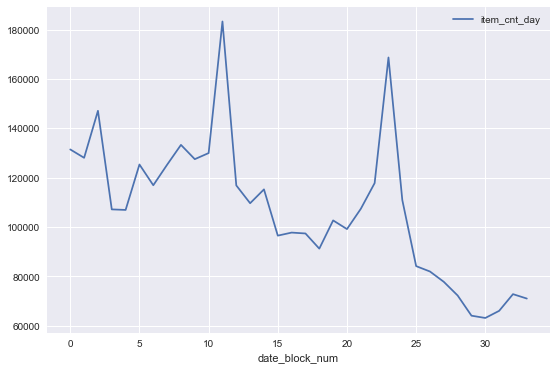

In [27]:
sales[['date_block_num', 'item_cnt_day']].groupby('date_block_num').sum().plot(figsize=(9, 6))
plt.show()

In [28]:
df = sales.copy()
test_set = test.copy()

In [29]:
df = df.merge(items[['item_category_id']], how='left', on='item_id')
test_set = test_set.merge(items[['item_category_id']], how='left', on='item_id')
test_set.index.rename('ID', inplace=True)

In [30]:
sales.shape[0] == df.shape[0], test_set.shape[0] == test.shape[0]

(True, True)

In [32]:
df.columns, test.columns

(Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
        'item_cnt_day', 'key', 'item_category_id'],
       dtype='object'), Index(['shop_id', 'item_id', 'key'], dtype='object'))

In [33]:
df.isna().sum(), test.isna().sum()

(date                0
 date_block_num      0
 shop_id             0
 item_id             0
 item_price          0
 item_cnt_day        0
 key                 0
 item_category_id    0
 dtype: int64, shop_id    0
 item_id    0
 key        0
 dtype: int64)

In [34]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [35]:
attr = ['year', 'month', 'week', 'day']
for a in attr: 
    df[a] = getattr(df['date'].dt, a)
    
df.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'key', 'item_category_id', 'year', 'month', 'week',
       'day'],
      dtype='object')

In [36]:
d = df[['date_block_num', 'day']].groupby(['date_block_num']).max()
di = dict([(d.index[i], d.values[i][0]) for i in range(len(d))])
df['day_count'] = df['date_block_num'].map(di)
df.loc[((df['week'] == 1) & (df['day'] > 7)), 'week'] = 53
df['week_block_num'] = (df['year'] - df['year'].min()) * 52 + df['week']

wmax = df[['date_block_num', 'week_block_num']].groupby(['date_block_num']).max()
wmin = df[['date_block_num', 'week_block_num']].groupby(['date_block_num']).min()
di = dict([(wmax.index[i], wmax.values[i][0] - wmin.values[i][0]) for i in range(len(wmax))])
df['week_count'] = df['date_block_num'].map(di)

df['qtr'] = df['month'].map(dict([[i, int(i // 3.1 + 1)] for i in df['month'].unique()]))
df['x_mas'] = df['month'].map(dict([[i, i // 12] for i in df['month'].unique()]))

In [37]:
df.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'key', 'item_category_id', 'year', 'month', 'week',
       'day', 'day_count', 'week_block_num', 'week_count', 'qtr', 'x_mas'],
      dtype='object')

In [39]:
to_group = ['date_block_num', 'shop_id', 'item_id', 'key', 'item_category_id',
            'year', 'month', 'day_count', 'week_count', 'qtr', 'x_mas']

to_mean = ['item_price']

to_sum = ['item_cnt_day']

In [40]:
da = df[to_group].copy()
da = pd.concat([da,
                df[to_group + to_mean].groupby(to_group).transform('mean'),
                df[to_group + to_sum].groupby(to_group).transform('sum'),
               ], axis=1).drop_duplicates()
da.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)
da.head()

,date_block_num,shop_id,item_id,key,item_category_id,year,month,day_count,week_count,qtr,x_mas,item_price,item_cnt_month
0,0,59,22154,22154_59,37,2013,1,31,4,1,0,999.00,1.0
1,0,25,2552,2552_25,58,2013,1,31,4,1,0,899.00,0.0
3,0,25,2554,2554_25,58,2013,1,31,4,1,0,1709.05,1.0
4,0,25,2555,2555_25,56,2013,1,31,4,1,0,1099.00,1.0
5,0,25,2564,2564_25,59,2013,1,31,4,1,0,349.00,1.0


In [41]:
da.describe(include='all')

,date_block_num,shop_id,item_id,key,item_category_id,year,month,day_count,week_count,qtr,x_mas,item_price,item_cnt_month
count,1.609124e+06,1.609124e+06,1.609124e+06,1609124,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06,1.609124e+06
unique,NaN,NaN,NaN,424124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,7894_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.466479e+01,3.280585e+01,1.068099e+04,NaN,4.154192e+01,2.013793e+03,6.154612e+00,3.042030e+01,4.178714e+00,2.389544e+00,7.802444e-02,7.908847e+02,2.267200e+00
std,9.542322e+00,1.653701e+01,6.238883e+03,NaN,1.632365e+01,7.773326e-01,3.455231e+00,8.940568e-01,3.831128e-01,1.117859e+00,2.682101e-01,1.551605e+03,8.649882e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,2.013000e+03,1.000000e+00,2.800000e+01,4.000000e+00,1.000000e+00,0.000000e+00,9.000000e-02,-2.200000e+01
25%,6.000000e+00,2.100000e+01,5.045000e+03,NaN,3.000000e+01,2.013000e+03,3.000000e+00,3.000000e+01,4.000000e+00,1.000000e+00,0.000000e+00,1.990000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,1.049700e+04,NaN,4.000000e+01,2.014000e+03,6.000000e+00,3.100000e+01,4.000000e+00,2.000000e+00,0.000000e+00,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.606000e+04,NaN,5.500000e+01,2.014000e+03,9.000000e+00,3.100000e+01,4.000000e+00,3.000000e+00,0.000000e+00,8.985000e+02,2.000000e+00


In [42]:
test_set.columns

Index(['shop_id', 'item_id', 'key', 'item_category_id'], dtype='object')

In [43]:
avg_prices = pd.concat((da[['date_block_num', 'item_id']], da[['date_block_num', 'item_id','item_price']]
                        .groupby(['date_block_num', 'item_id'])
                        .transform('mean')), axis=1).sort_values(by=['date_block_num', 'item_id']).drop_duplicates().sort_values(by=['item_id', 'date_block_num'], ascending=False)

for m in da['date_block_num'].unique():
    mask = ~test_set['key'].isin(da['key'][da['date_block_num'] == m])
    mask2 = (da['date_block_num'] == m)
    
    md = test_set[['key', 'shop_id', 'item_id', 'item_category_id']][mask]
    md['date_block_num'] = m
    for col in ['year', 'month', 'day_count', 'week_count', 'qtr', 'x_mas']: md[col] = da[col][mask2].max()
    
    avg = avg_prices[avg_prices['date_block_num'] <= m].drop(columns='date_block_num').groupby('item_id').mean()
    md['item_price'] = md['item_id'].map(dict(zip(avg.index, avg.values[:, 0]))).fillna(0)
    md['item_cnt_month'] = 0
    
    da = da.append(md, ignore_index=True, sort=True)

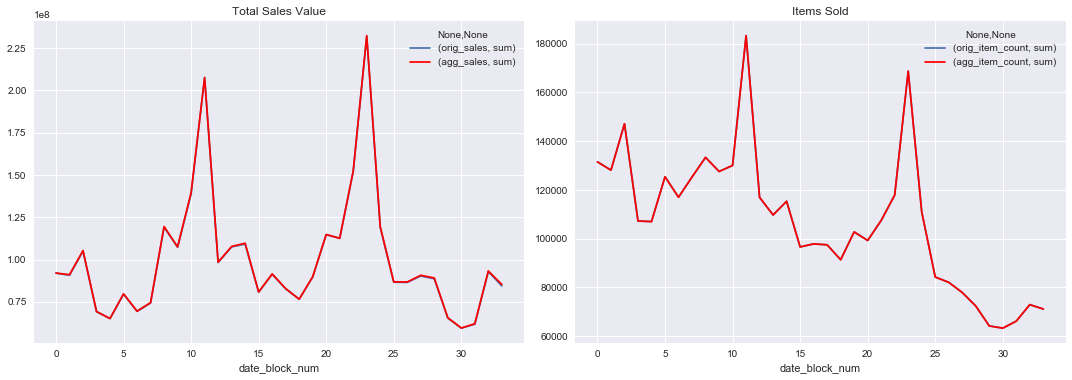

In [44]:
s_ch = sales.copy()
s_ch["orig_sales"] = s_ch["item_price"] * s_ch["item_cnt_day"]
s_ch["orig_item_count"] = s_ch["item_cnt_day"]

a_ch = da.copy()
a_ch["agg_sales"] = a_ch["item_price"] * a_ch["item_cnt_month"]
a_ch["agg_item_count"] = a_ch["item_cnt_month"]

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))

s_ch[["date_block_num", "orig_sales"]].groupby("date_block_num").agg([sum]).plot(legend=True, ax=ax1, title="Total Sales Value")
s_ch[["date_block_num", "orig_item_count"]].groupby("date_block_num").agg([sum]).plot(legend=True, ax=ax2, title="Items Sold")

a_ch[["date_block_num", "agg_sales"]].groupby("date_block_num").agg([sum]).plot(legend=True, ax=ax1, color='r')
a_ch[["date_block_num", "agg_item_count"]].groupby("date_block_num").agg([sum]).plot(legend=True, color='r', ax=ax2)


plt.tight_layout()
plt.show()

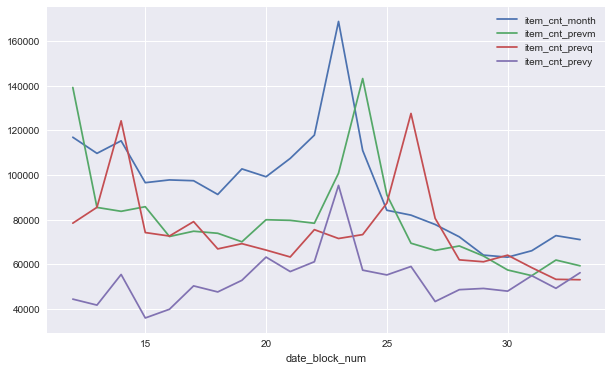

In [45]:
da['prev_month'] = da['date_block_num'].map(dict([[i, i-1] if i > 0 else [i, np.nan] for i in df['date_block_num'].unique()]))
da['prev_qtr'] = da['date_block_num'].map(dict([[i, i-3] if i > 2 else [i, np.nan] for i in df['date_block_num'].unique()]))
da['prev_year'] = da['date_block_num'].map(dict([[i, i-12] if i > 11 else [i, np.nan] for i in df['date_block_num'].unique()]))

di = dict(zip(da['date_block_num'].astype('float32').map(str) + da['key'].values, da['item_cnt_month']))

def prev_sales(prevsale, prevperiod): 
    da[prevsale] = (da[prevperiod].map(str) + da['key']).map(di).fillna(0)
    da.drop(columns=prevperiod, inplace=True)

prev_sales('item_cnt_prevm', 'prev_month')
prev_sales('item_cnt_prevq', 'prev_qtr')
prev_sales('item_cnt_prevy', 'prev_year')
da[['date_block_num','item_cnt_month', 'item_cnt_prevm', 'item_cnt_prevq', 'item_cnt_prevy']][da['date_block_num'] > 11].groupby(['date_block_num']).sum().plot(figsize=(10, 6))
plt.show()

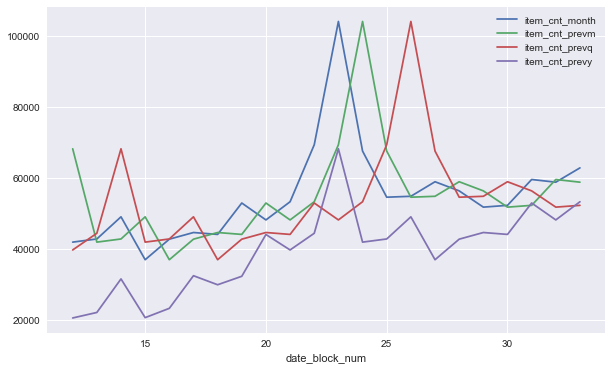

In [46]:
da[['date_block_num','item_cnt_month', 'item_cnt_prevm', 'item_cnt_prevq', 'item_cnt_prevy']][(da['key'].isin(test['key'])) & (da['date_block_num'] > 11)].groupby(['date_block_num']).sum().plot(figsize=(10, 6))
plt.show()

In [48]:
price_map = dict(da[['key', 'item_price']][da['date_block_num'] == da['date_block_num'].max()].values)
test_set['item_price'] = test_set['key'].map(price_map).fillna(0)
test_set['date_block_num'] = da['date_block_num'].max() + 1
test_set['year'] = 2015
test_set['month'] = 11
test_set['day_count'] = 30
test_set['week_count'] = 4
test_set['qtr'] = 4
test_set['x_mas'] = 0
lags = [['item_cnt_prevm', 0], ['item_cnt_prevq', 2], ['item_cnt_prevy', 11]]
for l in lags: test_set[l[0]] = test_set['key'].map(dict(da[['key', 'item_cnt_month']][(da['date_block_num'] == da['date_block_num'].max() - l[1])].values))

In [49]:
da[['year', 'month']][da['year']==da['year'].max()].max()

year     2015
month      10
dtype: int64

In [50]:
to_val = (da['date_block_num'] == da['date_block_num'].max())
to_train = (da['date_block_num'] > da['date_block_num'].max() - 12) & (da['date_block_num'] != da['date_block_num'].max())

X_train = da[to_train].drop(columns=['item_cnt_month', 'date_block_num', 'key'])
X_val = da[to_val].drop(columns=['item_cnt_month', 'date_block_num', 'key'])

In [51]:
da['item_cnt_month'].skew()

146.66675180100336

In [52]:
y_train = np.log1p(da['item_cnt_month'][to_train].clip(0., 20.))
y_val = np.log1p(da['item_cnt_month'][to_val].clip(0., 20.))

X_train.shape, y_train.shape, X_val.shape, y_val.shape, da.shape

((2502889, 13), (2502889,), (217051, 13), (217051,), (8291765, 16))

In [53]:
def RMSE(targ, pred): return np.sqrt(np.mean((np.expm1(targ) - np.expm1(pred))**2))

In [55]:
from sklearn.ensemble import RandomForestRegressor

def review(X_train, X_val):
    m.fit(X_train, y_train)
    preds = m.predict(X_val)
    print("-"*30, f'''
    Training score: {m.score(X_train, y_train)*100:.2f}%
    Validation score: {m.score(X_val, y_val)*100:.2f}%
    Out-of-Bag score: {m.oob_score_*100:.2f}%
    RMSE: {RMSE(y_val, preds):.4f}
    ''')

m = RandomForestRegressor(n_estimators=50, max_features=0.85, min_samples_leaf=5,
                          n_jobs=-1, oob_score=True)

review(X_train, X_val)

C:\Users\Glenn\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


------------------------------ 
    Training score: 87.13%
    Validation score: 50.81%
    Out-of-Bag score: 77.54%
    RMSE: 0.9374
    


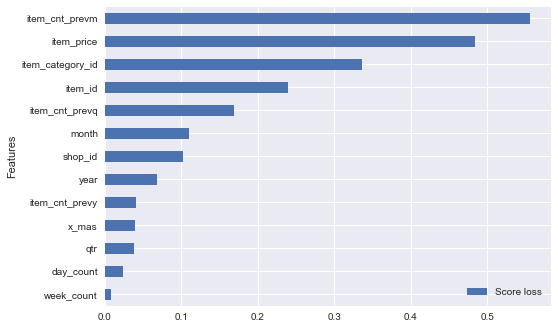

In [56]:
def f_i(X_train, X_val, use_RMSE=False):
    global FI
    accs = []
    if use_RMSE:
        targ = RMSE(m.predict(X_train), y_train)
    else:
        targ = m.score(X_train, y_train) 
    num_features = 15

    for c in X_train.columns:
        X = X_train.copy()
        X[c] = X[[c]].sample(frac=1).set_index(X.index)[c]  # random shuffle of one column
        if use_RMSE: 
            accs.append(RMSE(m.predict(X), y_train) - targ)
        else: 
            accs.append(targ - m.score(X, y_train))


    FI = sorted([[c, float(a)] for c, a in zip(X.columns, accs)], key=lambda x: x[1], reverse=True)[:num_features]
    pd.DataFrame({'Score loss': [FI[i][1] for i in range(len(FI))], 'Features': [FI[i][0] for i in range(len(FI))]}).set_index('Features').sort_values(by='Score loss', ascending=True).plot.barh()
    plt.show()
    
f_i(X_train, X_val, use_RMSE=True)

In [58]:
top = -2
selected = [FI[i][0] for i in range(len(FI))][:top]
Xt = X_train[selected].copy()
Xv = X_val[selected].copy()


m = RandomForestRegressor(n_estimators=50, max_features=0.85, min_samples_leaf=5,
                          n_jobs=-1, oob_score=True)
review(Xt, Xv)

------------------------------ 
    Training score: 86.95%
    Validation score: 51.79%
    Out-of-Bag score: 77.44%
    RMSE: 0.9395
    


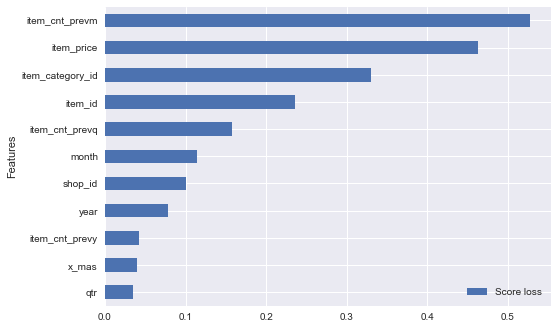

In [59]:
f_i(Xt, Xv, use_RMSE=True)

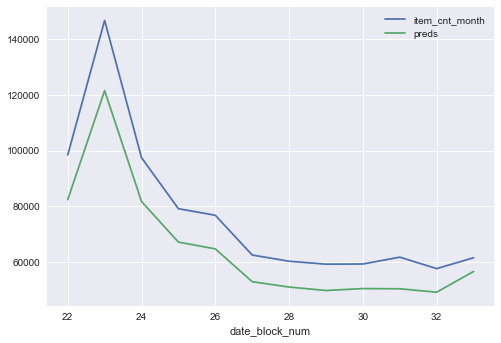

In [60]:
tp = da[['date_block_num', 'item_cnt_month']][to_train]
tp['item_cnt_month'].clip(0., 20., inplace=True)
tp['preds'] = np.expm1(m.predict(Xt))
pd.concat((tp['date_block_num'], tp.groupby('date_block_num').transform('sum')), axis=1).drop_duplicates().append(
    {'date_block_num': 33,'item_cnt_month': da['item_cnt_month'][da['date_block_num'] == da['date_block_num'].max()]
     .clip(0., 20.).sum(), 'preds': np.expm1(m.predict(Xv)).sum()}, ignore_index=True).groupby('date_block_num').sum().plot()
plt.show()

In [61]:
mask = (da['date_block_num'] > da['date_block_num'].max() - 12)
X_train = da[selected][mask]
# X_train = da.drop(columns=['item_cnt_month', 'date_block_num', 'key'])[mask]
y_train = np.log1p(da['item_cnt_month'].clip(0., 20.))[mask]

In [62]:

m = RandomForestRegressor(n_estimators=50, max_features=0.85, min_samples_leaf=5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print("-"*30, f'''
Training score: {m.score(X_train, y_train)*100:.2f}%
RMSE: {RMSE(m.predict(X_train), y_train):.4f}
''')

------------------------------ 
Training score: 86.73%
RMSE: 0.6367

Wall time: 8min 4s


In [69]:
X_test = test_set[selected]
# X_test = test_set.drop(columns=['date_block_num', 'key'])
y_test = np.expm1(m.predict(X_test))

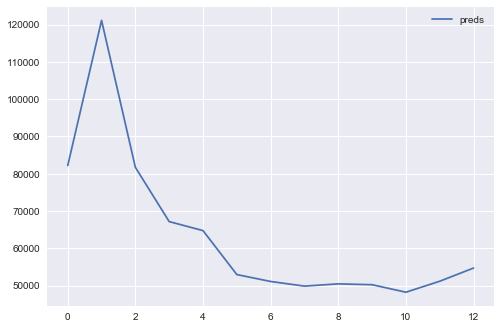

In [64]:
tp = da[['date_block_num']][mask]
tp['preds'] = np.expm1(m.predict(X_train))
tp = tp.groupby('date_block_num').transform('sum').drop_duplicates()
tp.append({'preds': sum(y_test)}, ignore_index=True).plot()
plt.show()

In [70]:
test_set['item_cnt_month'] = y_test
name = 'submission.csv'
my_submission = test_set[['item_cnt_month']].clip(0., 20.)
my_submission.to_csv(name)
pd.read_csv(name).head()

,ID,item_cnt_month
0,0,0.465717
1,1,0.000000
2,2,1.272143
3,3,0.299871
4,4,0.000000
